In [266]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)

import pandas as pd


from gp_fijando_operaciones import *

In [267]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [268]:
funcdict = {
        'add' : 5,
        'sub' : 5,
        'mul' : 4,
        'div' : 4,
        'inv' : 3,
        'log' : 3,
        'max' : 1,
        'min' : 1,
        'sqrt' : 4,
        'exp' : 4,
        'floor': 1
}

gp_fijando_operaciones = GP(M=500,
							max_depth=15,
							prob_node_symb=0.5,
							func_list=list(funcdict.keys()),
                                                        prob_func=list(funcdict.values()),
							depth_penalty=0.005,
							const_range=(0,2) )
res = gp_fijando_operaciones.execute(x,y, generations=100)
res

/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: invalid value encountered in subtract
  return self.operator(*args)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
/Users/sarabordonaba/Documentos/UNI/Master/Computación evolutiva/practica grupal/c_evol/funcs.py:20: RuntimeWarning: invalid value encountered in multiply
  return self.operator(*args)
/Users/sarabordonaba/Docum

{'total_generations': 100,
 'best_fitness': array([         nan,          nan, 168.76816652, 168.76816652,
        168.76816652,  41.08455823,  41.08455823,  41.08455823,
         24.87479837,  24.87479837,  24.87479837,  17.8553805 ,
         17.8553805 ,  17.8553805 ,  17.8553805 ,  17.8553805 ,
         17.8553805 ,  17.8553805 ,  17.8553805 ,  17.8553805 ,
          4.67283979,   4.67283979,   4.67283979,   4.67283979,
          4.67283979,   4.67283979,   4.67283979,   4.67283979,
          4.67283979,   4.67283979,   4.67283979,   4.67283979,
          4.67283979,   4.67283979,   4.67283979,   4.67283979,
          4.15451682,   4.15451682,   4.15451682,   4.15451682,
          3.15011121,   3.15011121,   3.15011121,   3.15011121,
          3.15011121,   3.15011121,   3.15011121,   3.15011121,
          3.15011121,   3.15011121,   3.15011121,   3.15011121,
          3.15011121,   2.82480658,   2.82480658,   2.82480658,
          2.55249811,   2.55249811,   2.35021391,   2.3502139

**Mejor fitness con y sin penalización**

In [269]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.1000058605481318
best fitness penalizado:	2.2365371338319933


In [270]:
#(res["best_trees"][0]).pprint()

**Ecuación**

In [271]:
print(res['best_trees'][-1])

div(add(x,1.1610855239848474),log(mul(add(x,sqrt(sqrt(mul(add(mul(sqrt(exp(div(max(1.8712556047563864,0.5032662995882091),mul(0.3662605722093166,0.5986965302310454)))),exp(div(max(1.925733575783541,0.5032662995882091),mul(0.3662605722093166,0.5986965302310454)))),sub(sub(div(max(1.925733575783541,max(exp(div(max(1.925733575783541,0.5032662995882091),mul(0.3662605722093166,0.5986965302310454))),0.5032662995882091)),mul(0.3662605722093166,0.5986965302310454)),add(x,x)),add(x,add(x,x)))),x)))),mul(add(sub(0.04069812756709856,add(x,1.1610855239848474)),x),mul(1.239641111997089,0.2432558829953433)))))


**Gráfica árbol**

In [272]:
(res["best_trees"][-1]).pprint()


     ____________________div_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
    /                                                                                                                                                                                                                                                                                                                                                                                                                                              

**Gráficos**

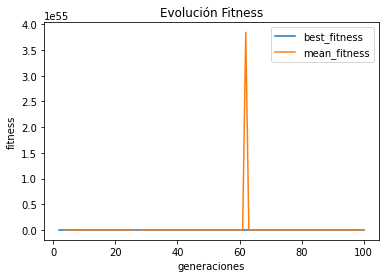

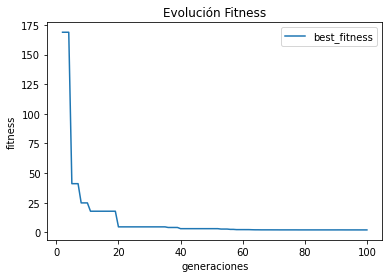

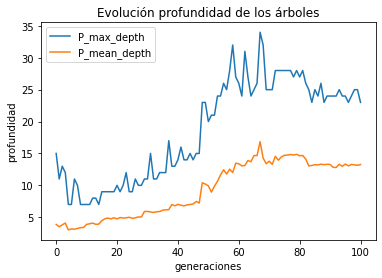

In [273]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()